# **Recommendation System**

A recommendation system, is a subclass of information filtering system that seeks to predict the best “preference” a user would give to an item which is typically obtained by optimizing for objectives like total clicks, total uploads, and overall searches.

***Content Based Filtering Methods:*** 

In these types of systems, the descriptive attributes of items/users are used to make recommendations. Here, the ratings and interaction behavior of users are combined with the content information available in the items.

***Collaborative Filtering Methods:*** 

These types of models use the collaborative power of the ratings provided by multiple users to make recommendations and rely mostly on leveraging either inter-item correlations or inter-user interactions for the prediction process. It relies on an underlying notion that two users who rate items similarly are likely to have comparable preferences for other items.
There are two types of methods that are commonly used in collaborative filtering:

**Memory-based methods**: Here, ratings of user-item combinations are predicted based on their neighborhoods. These neighborhoods can be further defined as (1) User Based (2) Item Based

**Model-based methods**: Here, ML techniques are used to learn model parameters within the context of a given optimization framework.

### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
from scipy.sparse import csr_matrix

# %matplotlib inline
plt.style.use("ggplot")

import sklearn

In [ ]:
user = pd.read_csv('/content/users.csv')
user = user.dropna()
user.rename(columns = {'_id':'user_id'}, inplace = True)
user.head()

,user_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


In [ ]:
posts = pd.read_csv('/content/posts.csv')
posts = posts.dropna()
posts.rename(columns = {'_id':'post_id'}, inplace = True)
posts.head()

,post_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [ ]:
views = pd.read_csv('/content/views.csv')
views = views.dropna()
views.head()

,user_id,post_id,timestamp
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z


## Analyzing Data

In [ ]:
popular = pd.DataFrame(posts.groupby('category')['post_id'].count())
popular.head(10)

,post_id
category,
2D Composition|Watercolours|Painting,1
Accounting|Financial Accounting,1
Accounting|Fundamental Of Accounting,2
Accounting|Partnership Accounting|Corporate Accounting|Accounting Theory And Practices,1
Archeology|Human Prehistory,1
Architecture,1
Art,3
Art; Science,1
Artificial Intelligence|Machine Learning|Information Technology,1


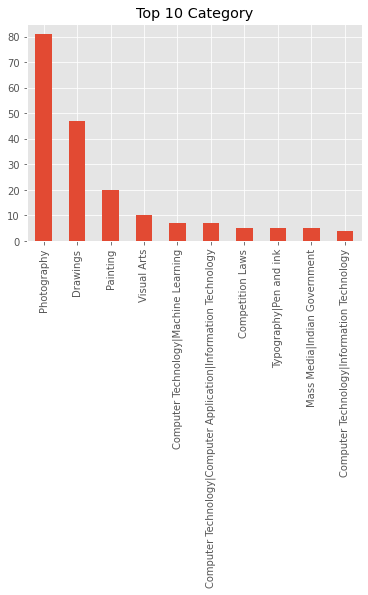

In [ ]:
posts.category.value_counts().head(10).plot.bar(title="Top 10 Category")

In [ ]:
data = pd.merge(views,user,on='user_id')
data.head()

,user_id,post_id,timestamp,name,gender,academics
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Niriksha Sharma,female,undergraduate
1,5df49b32cc709107827fb3c7,5ecd5d417023451e662235c5,2020-05-26T20:11:07.153Z,Niriksha Sharma,female,undergraduate
2,5df49b32cc709107827fb3c7,5dee9b5042a8854bf6eabaaf,2020-05-25T09:58:52.351Z,Niriksha Sharma,female,undergraduate
3,5df49b32cc709107827fb3c7,5ecb72c0eaff6b0c3a58a48e,2020-05-25T07:27:20.699Z,Niriksha Sharma,female,undergraduate
4,5df49b32cc709107827fb3c7,5ec3c09274f7660d73aa1229,2020-05-25T07:26:57.220Z,Niriksha Sharma,female,undergraduate


In [ ]:
frequency = pd.DataFrame(data.groupby('name')['post_id'].count())
frequency

,post_id
name,
Aanjan Prasath G,5
Aayushree Khokhar,7
Abhinav Mishra,2
Abhishank Gupta,13
Abhishek Kumar,5
...,...
gauri raskar,1
hritik chaturvedi,1
siddharth saxena,69


In [ ]:
df = pd.merge(views,posts,on='post_id')
df.head()

,user_id,post_id,timestamp,title,category,post_type
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
1,5ec3ba5374f7660d73aa1201,5ec821ddec493f4a2655889e,2020-05-24T10:49:55.177Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
2,5ec2204374f7660d73aa100f,5ec821ddec493f4a2655889e,2020-05-24T09:23:57.537Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
3,5d7c994d5720533e15c3b1e9,5ec821ddec493f4a2655889e,2020-05-22T20:11:32.317Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
4,5de50d768eab6401affbb135,5ec821ddec493f4a2655889e,2020-05-22T20:10:41.100Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork


In [ ]:
df.groupby('title')['category'].count().sort_values(ascending=False).head(10)

title
Daaku                                             18
Machine Learning”&“Operations" (MlOps)            16
Faith in yourself                                 14
Gangster Style                                    14
The Waves Have Stood Still                        14
Women power                                       13
Understanding Cloud Computing(AWS)                13
AWS services and how to launch OS on AWS Cloud    12
Ruins.                                            12
HUMAN ILLUSTRATION                                12
Name: category, dtype: int64

In [ ]:
df.groupby('user_id')['category'].count().sort_values(ascending=False).head(10)

user_id
5d60098a653a331687083238    221
5d610ae1653a331687083239    131
5d7c994d5720533e15c3b1e9     86
5deeef6142a8854bf6eabab9     66
5df20f1fee4bb5252b4f5351     66
5e1ef04c2a37d20505da2b8b     61
5e5af599d701ab08af792b63     59
5e7cf05bcfc8b713f5ac7db7     48
5defd51362624b0135ea9fd2     45
5ecb979eeaff6b0c3a58a4f0     36
Name: category, dtype: int64

### Word Cloud

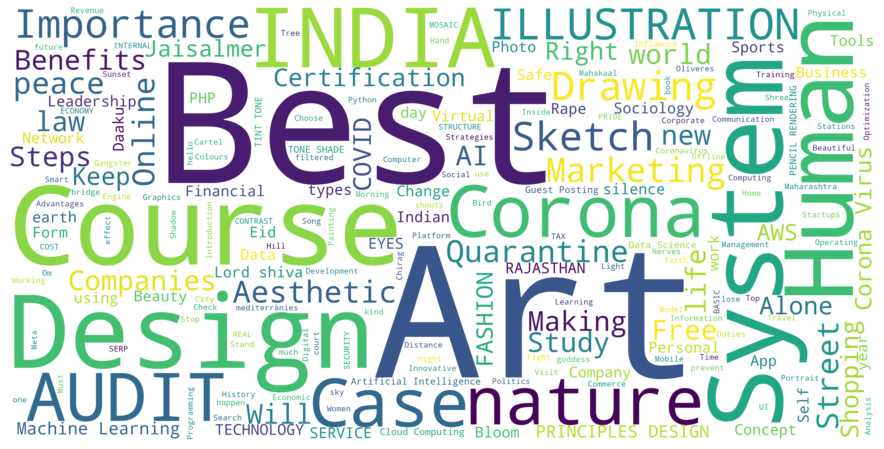

In [ ]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
posts['title'] = posts['title'].fillna("").astype('str')
title_corpus = ' '.join(posts['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud,interpolation='bilinear')
plt.axis('off');

For finding appropriate results, I applied a hybrid approach by combining content based filtering and collaborative filtering.

My Approaches are:

## Approach 1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
posts['category'] = posts['category'].fillna('')

In [ ]:
tfv_matrix = tfv.fit_transform(posts['category'])

In [ ]:
tfv_matrix.shape

(465, 228)

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [ ]:
indices = pd.Series(posts.index, index=posts['title']).drop_duplicates()

In [ ]:
indices.head()

title
hello there                      0
Ml and AI                        1
What is an Operating System ?    2
Lord Shiva                       3
How Competition law evolved?     4
dtype: int64

In [ ]:
def give_rec(title,no_of_rec, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the posts 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar posts
    sig_scores = sig_scores[0:no_of_rec+1]

    # post indices
    post_index = [i[0] for i in sig_scores]

    # Top 10 most similar posts
    return posts['title'].iloc[post_index]

In [ ]:
def recommend_post(title,n=10):
  rec=give_rec(title,n).to_list()
  count=0
  for item in rec:
    if not (item==title) and count<=n:
      count+=1
      print(item)

In [ ]:
data_df = pd.merge( user,views, on='user_id')
data_df = pd.merge( data_df,posts, on='post_id') 
data_df=data_df.drop(columns=['user_id','gender','academics','post_id','category'])
data_df.head()

,name,timestamp,title,post_type
0,Nivesh Singh Chauhan,2020-05-31T18:01:54.308Z,Configure Docker with Django; PostgreSQL; Pg-a...,blog
1,Kanika Sharma,2020-05-31T20:40:18.693Z,Configure Docker with Django; PostgreSQL; Pg-a...,blog
2,Asif Hossain,2020-06-01T08:08:54.124Z,Configure Docker with Django; PostgreSQL; Pg-a...,blog
3,Parth Vijay,2020-05-31T10:08:37.079Z,Configure Docker with Django; PostgreSQL; Pg-a...,blog
4,Nivesh Singh Chauhan,2020-05-31T08:21:29.911Z,AWS services and how to launch OS on AWS Cloud,blog


In [ ]:
def recommend_user(user_name,n=10):
  curr=data_df.query('name == @user_name')
  latest=max(curr['timestamp'])
  curr=curr.query('timestamp==@latest')
  for i in (curr['title']):
    print("Recent Post viewed:-", i)
    print("\nRecommended for you:\n")
    recommend_post(i,n)

### Recommend similar posts for the given post


In [ ]:
recommend_post("Ml and AI",5)

6 Best + Free PLC Programming Training & Course [2020 UPDATED]
What sports will look like in the future
Artificial Intelligence
Types Of AI.
7 Best Python Data Science Courses & Certification [2020]


In [ ]:
recommend_post("Lord Shiva",5)

Trident
Lord shiva
Kid Bu
Shadow Sketch
The Chosen


### Recommend posts for the given user

In [ ]:
recommend_user("Abhishank Gupta")

Recent Post viewed:- Goldfish

Recommended for you:

Colours of pushkar.
Spirituality
Travelling
screw town
screw2
Aesthetic
Quarantined
Bloom🌸
Dog❤️
Leap of faith
The silence that shouts


In [ ]:
recommend_user("Sahana B")

Recent Post viewed:- Understanding Cloud Computing(AWS)

Recommended for you:

MIS
Ethernet
What is Information technology?
CI/CD using GitHub Actions
Topology & it's types
Information System
Stereoscopic and virtual-reality systems
Mobile Computing Technology
App Development
Firewall
Will AI replace humans intellectual work?



## Approach 2 (for most popular post)

In [ ]:
dataframe = pd.DataFrame(views)

In [ ]:

dataframe["Value"] = np.random.randint(1, 6, len(dataframe))

In [ ]:
dataframe.head()

,user_id,post_id,timestamp,Value
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,3
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,1
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,4
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,4
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,2


In [ ]:
df = pd.merge(dataframe, posts ,on='post_id')
df.head()

,user_id,post_id,timestamp,Value,title,category,post_type
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,3,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
1,5ec3ba5374f7660d73aa1201,5ec821ddec493f4a2655889e,2020-05-24T10:49:55.177Z,2,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
2,5ec2204374f7660d73aa100f,5ec821ddec493f4a2655889e,2020-05-24T09:23:57.537Z,4,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
3,5d7c994d5720533e15c3b1e9,5ec821ddec493f4a2655889e,2020-05-22T20:11:32.317Z,1,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
4,5de50d768eab6401affbb135,5ec821ddec493f4a2655889e,2020-05-22T20:10:41.100Z,4,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork


In [ ]:
data = df.drop(['timestamp', 'category'], axis=1)

In [ ]:
data.head()

,user_id,post_id,Value,title,post_type
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,3,Save Earth.,artwork
1,5ec3ba5374f7660d73aa1201,5ec821ddec493f4a2655889e,2,Save Earth.,artwork
2,5ec2204374f7660d73aa100f,5ec821ddec493f4a2655889e,4,Save Earth.,artwork
3,5d7c994d5720533e15c3b1e9,5ec821ddec493f4a2655889e,1,Save Earth.,artwork
4,5de50d768eab6401affbb135,5ec821ddec493f4a2655889e,4,Save Earth.,artwork


In [ ]:
combine_post_rating = data.dropna(axis = 0, subset = ['title'])

post_ratingCount = (combine_post_rating.
     groupby(by = ['title'])['Value'].
     count().
     reset_index().
     rename(columns = {'Value': 'totalValueCount'})
     [['title', 'totalValueCount']]
    )
post_ratingCount.head()


,title,totalValueCount
0,'The Virtual ME',3
1,10 Best Artificial Intelligence (AI) Courses O...,2
2,10 Best UI UX Design Course & Certification [2...,2
3,100 Free University Courses Online [2020],5
4,20 Best Data Science Certification & Courses f...,1


In [ ]:
rating_with_totalValueCount = combine_post_rating.merge(post_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalValueCount.tail()

,user_id,post_id,Value,title,post_type,totalValueCount
1354,5d60098a653a331687083238,5e294fd1c85ab714a7da6643,3,Personal growth,blog,1
1355,5d610ae1653a331687083239,5e7c78fdcfc8b713f5ac7daa,3,Types Of AI.,blog,1
1356,5d60098a653a331687083238,5dc065ca24b883670268772f,5,Colours of pushkar.,artwork,1
1357,5d60098a653a331687083238,5e7a5ebdcfc8b713f5ac7d7f,4,I won the Art.,artwork,1
1358,5d60098a653a331687083238,5e7a629ccfc8b713f5ac7d84,4,3D composition.,artwork,1


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(post_ratingCount['totalValueCount'].describe())

count   450.000
mean      3.020
std       2.802
min       1.000
25%       1.000
50%       2.000
75%       4.000
max      18.000
Name: totalValueCount, dtype: float64


In [ ]:
print(post_ratingCount['totalValueCount'].quantile(np.arange(.9, 1, .01)))

0.900    7.000
0.910    7.000
0.920    8.000
0.930    8.000
0.940    9.000
0.950    9.000
0.960   10.000
0.970   11.000
0.980   12.000
0.990   13.510
Name: totalValueCount, dtype: float64


In [ ]:
popular_threshold = 12
rating_popular_post = rating_with_totalValueCount.query('totalValueCount >= @popular_threshold')
rating_popular_post.tail()

,user_id,post_id,Value,title,post_type,totalValueCount
600,5e3563348d344822fed4d13a,5ec2215374f7660d73aa1011,2,Women power,artwork,13
601,5defd51362624b0135ea9fd2,5ec2215374f7660d73aa1011,2,Women power,artwork,13
602,5e7cf05bcfc8b713f5ac7db7,5ec2215374f7660d73aa1011,5,Women power,artwork,13
603,5e35a5ed8d344822fed4d13e,5ec2215374f7660d73aa1011,1,Women power,artwork,13
604,5d60098a653a331687083238,5ec2215374f7660d73aa1011,4,Women power,artwork,13


In [ ]:
rating_popular_post.shape

(150, 6)

In [ ]:
user.head()

,user_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


In [ ]:
from scipy.sparse import csr_matrix
rating_popular_post = rating_popular_post.drop_duplicates(['user_id', 'title'])
rating_popular_post_pivot = rating_popular_post.pivot(index = 'title', columns = 'user_id', values = 'Value').fillna(0)
rating_popular_post_matrix = csr_matrix(rating_popular_post_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(rating_popular_post_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
rating_popular_post_pivot.shape[0]

11

In [ ]:
rating_popular_post_pivot

user_id,5d60098a653a331687083238,5d610ae1653a331687083239,5d618359fc5fcf3bdd9a0910,5d6d2bb87fa40e1417a49315,5d7c994d5720533e15c3b1e9,5de50d768eab6401affbb135,5deeef6142a8854bf6eabab9,5defd51362624b0135ea9fd2,5df20f1fee4bb5252b4f5351,5df49b32cc709107827fb3c7,5e1ef04c2a37d20505da2b8b,5e3563348d344822fed4d13a,5e35a5ed8d344822fed4d13e,5e37b16ceab55d319938a6f8,5e4195c3eab55d319938a82c,5e5af599d701ab08af792b63,5e7b30a6cfc8b713f5ac7d95,5e7cf05bcfc8b713f5ac7db7,5eb2cad810426255a7aaa072,5eb508ae10426255a7aaa12c,5ec11abc74f7660d73aa0fbd,5ec2204374f7660d73aa100f,5ec3ba5374f7660d73aa1201,5ecb979eeaff6b0c3a58a4f0,5ecdf7397023451e66223784,5ece02427023451e66223861,5ecfbcb376027d35905cbfe5,5ed0bfc176027d35905cc1f8,5ed0cfc676027d35905cc26a,5ed0d9bc76027d35905cc2c2,5ed0defa76027d35905cc2de,5ed0dfec76027d35905cc2ec,5ed0fc0976027d35905cc448,5ed12ae476027d35905cc4a1,5ed232b976027d35905cc689,5ed24d5a76027d35905cc7d7,5ed2edf176027d35905cc961,5ed350ed76027d35905cca2c,5ed3737976027d35905ccaa2,5ed3cbcbbd514d602c1530a7
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AWS services and how to launch OS on AWS Cloud,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,2.000,0.000,1.000,1.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,1.000,4.000,3.000,4.000
Art Expo 2020,0.000,2.000,0.000,2.000,1.000,2.000,5.000,3.000,0.000,4.000,5.000,5.000,0.000,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Daaku,5.000,2.000,4.000,4.000,4.000,5.000,1.000,4.000,3.000,5.000,0.000,1.000,1.000,3.000,0.000,4.000,0.000,4.000,4.000,0.000,0.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Faith in yourself,0.000,3.000,1.000,3.000,5.000,4.000,2.000,5.000,1.000,0.000,0.000,5.000,4.000,0.000,0.000,1.000,0.000,0.000,5.000,0.000,0.000,0.000,5.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Gangster Style,4.000,2.000,0.000,3.000,1.000,0.000,0.000,0.000,2.000,4.000,0.000,0.000,0.000,4.000,2.000,0.000,0.000,2.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
HUMAN ILLUSTRATION,2.000,0.000,0.000,4.000,5.000,4.000,1.000,3.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000
"Machine Learning”&“Operations"" (MlOps)",3.000,3.000,0.000,2.000,3.000,3.000,5.000,3.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,5.000,0.000,0.000,0.000,0.000,2.000,2.000,3.000,0.000,5.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000
Ruins.,3.000,4.000,0.000,5.000,4.000,0.000,5.000,3.000,0.000,5.000,1.000,3.000,0.000,0.000,0.000,3.000,0.000,2.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
The Waves Have Stood Still,1.000,3.000,0.000,2.000,5.000,4.000,4.000,1.000,0.000,0.000,0.000,1.000,2.000,0.000,0.000,4.000,3.000,4.000,0.000,0.000,0.000,0.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
query_index = np.random.choice(rating_popular_post_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(rating_popular_post_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

8


In [ ]:
rating_popular_post_pivot.index[query_index]

'The Waves Have Stood Still'

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_post_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, rating_popular_post_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Waves Have Stood Still:

1: HUMAN ILLUSTRATION, with distance of 0.2247576989154494:
2: Women power, with distance of 0.27833287221285263:
3: Ruins., with distance of 0.30197761173573356:
4: Machine Learning”&“Operations" (MlOps), with distance of 0.3406338604949225:
5: Faith in yourself, with distance of 0.3534626278795955:
